# 6SC030 Coursework 1910721

### Big Data Analytics for Establishing the Trend of Global Warming Temperatures due to Continental Irresponsibility

In [1]:
# data analysis libraries
import numpy as np
import pandas as pd

# visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#### Importing and reading dataset - Primary cleaning

In [49]:
# import the dataset CSV file
temp_change = pd.read_csv("temperature_change.csv", encoding = "ISO-8859-1")
Co2 = pd.read_csv("historical_emissions.csv", encoding = "ISO-8859-1")
temp_change.shape
Co2.shape

(195, 34)

#### Data Analysis

In [3]:
"""The very first thing we should look at the features of the dataset, the column names are the features"""
# get a list of the features within the dataset
print(temp_change.columns)

Index(['Area Code', 'Area', 'Months Code', 'Months', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019'],
      dtype='object')


In [4]:
"""Each row of the dataset indicates an observation"""
# have an overview of the data
temp_change.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [5]:
# sample of the dataset
temp_change.sample(5)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
2139,250,Democratic Republic of the Congo,7019,SepOctNov,6078,Standard Deviation,°C,0.218,0.218,0.218,...,0.218,0.218,0.218,0.218,0.218,0.218,0.218,0.218,0.218,0.218
5709,299,Palestine,7019,SepOctNov,6078,Standard Deviation,°C,0.749,0.749,0.749,...,0.749,0.749,0.749,0.749,0.749,0.749,0.749,0.749,0.749,0.749
4302,126,Lithuania,7010,October,7271,Temperature change,°C,NaN,NaN,NaN,...,-1.871,0.702,0.312,1.623,0.475,-1.011,-1.335,0.494,1.831,2.504
2601,65,Falkland Islands (Malvinas),7009,September,6078,Standard Deviation,°C,0.648,0.648,0.648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,258,Anguilla,7008,August,6078,Standard Deviation,°C,0.310,0.310,0.310,...,0.310,0.310,0.310,0.310,0.310,0.310,0.310,0.310,0.310,0.310


#### Clean up unecessary columns

Here we are removing the 'y' shown in the year feature to make the data more readable - 1961 is easier than Y1961

In [50]:
temp_change.columns = temp_change.columns.str.lower()
temp_change.columns = temp_change.columns.str.replace('y', '')
temp_change.head()

,area code,area,months code,months,element code,element,unit,1961,1962,1963,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [51]:
# Dropping irrelevant columns that have no meaning / no significance
temp_change.drop(columns=['area code', 'months code', 'element code', 'unit'], inplace=True)
temp_change.head()

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,January,Temperature change,0.777,0.062,2.744,-5.232,1.868,3.629,-1.432,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,Afghanistan,January,Standard Deviation,1.950,1.950,1.950,1.950,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,Afghanistan,February,Temperature change,-1.743,2.465,3.919,-0.202,-0.096,3.397,0.296,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,Afghanistan,February,Standard Deviation,2.597,2.597,2.597,2.597,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,Afghanistan,March,Temperature change,0.516,1.336,0.403,1.659,-0.909,-0.069,-0.759,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [8]:
temp_change.sample(5)

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
9374,European Union,DecJanFeb,Temperature change,1.400,0.300,-3.256,-0.702,-0.398,-0.123,0.217,...,-0.666,-0.463,0.759,0.495,2.789,1.918,2.884,1.466,1.340,2.028
5519,Norway,June,Standard Deviation,1.468,1.468,1.468,1.468,1.468,1.468,1.468,...,1.468,1.468,1.468,1.468,1.468,1.468,1.468,1.468,1.468,1.468
5221,Netherlands Antilles (former),October,Standard Deviation,0.444,0.444,0.444,0.444,0.444,0.444,0.444,...,0.444,0.444,0.444,0.444,0.444,0.444,0.444,0.444,0.444,0.444
3558,Indonesia,December,Temperature change,0.191,-0.066,0.221,-0.498,0.313,-0.052,-0.079,...,0.063,0.416,0.570,0.708,0.572,1.448,0.989,0.563,1.124,1.284
7724,Uganda,April,Temperature change,0.137,-0.069,-0.378,-0.217,-0.439,-0.257,0.279,...,1.962,1.421,0.763,0.468,1.172,0.073,1.830,2.217,-0.741,2.343


In [52]:
# The data has months containing multiple months e.g. 'Dec/Jan/Feb'
# Instead of seeing it like this we will replace them with the corresponding season e.g. 'Winter'
months_replace = {'Dec\x96Jan\x96Feb': 'Winter', 'Mar\x96Apr\x96May': 'Spring', 'Jun\x96Jul\x96Aug': 'Summer', 
                  'Sep\x96Oct\x96Nov': 'Autumn'}
temp_change.replace(months_replace, inplace=True)

In [10]:
temp_change.sample(5)

,area,months,element,1961,1962,1963,1964,1965,1966,1967,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
7628,Turkmenistan,July,Temperature change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.500,1.842,1.517,1.326,0.619,1.937,1.258,1.849,3.855,2.581
1803,Cook Islands,January,Standard Deviation,0.322,0.322,0.322,0.322,0.322,0.322,0.322,...,0.322,0.322,0.322,0.322,0.322,NaN,NaN,0.322,0.322,0.322
3376,Holy See,June,Temperature change,0.252,-0.611,0.105,1.248,-0.156,1.024,-1.329,...,0.933,1.616,3.175,0.369,1.418,2.227,1.448,3.494,2.216,3.754
7825,United Kingdom,March,Standard Deviation,1.359,1.359,1.359,1.359,1.359,1.359,1.359,...,1.359,1.359,1.359,1.359,1.359,1.359,1.359,1.359,1.359,1.359
1565,"China, mainland",January,Standard Deviation,0.931,0.931,0.931,0.931,0.931,0.931,0.931,...,0.931,0.931,0.931,0.931,0.931,0.931,0.931,0.931,0.931,0.931


### Functions to give specific dataframes for easy analysis

In [53]:
# function to get the temperature channge per country
def country_temp_change(temp_change, country):
    temp_changen = temp_change[(temp_change['element'] == 'Temperature change') & (temp_change['area'] == country)]
    temp_changen = temp_changen.set_index('months').transpose()[2:]
    temp_changen['year'] = temp_changen.index
    temp_changen.reset_index(drop=True, inplace=True)
    temp_changen.index.names = [country]
    temp_changen = temp_changen.astype('float')
    return temp_changen

In [54]:
uk = country_temp_change(temp_change, 'United Kingdom')
uk.head()

months,January,February,March,April,May,June,July,August,September,October,November,December,Winter,Spring,Summer,Autumn,Meteorological year,year
United Kingdom,,,,,,,,,,,,,,,,,,
0,-0.053,2.883,2.575,1.517,-0.101,0.073,-0.638,-0.182,1.163,0.188,-0.471,-2.273,0.607,1.330,-0.249,0.293,0.495,1961.0
1,0.705,0.820,-2.649,-0.345,-0.910,-0.514,-1.001,-1.091,-0.868,0.186,-0.823,-1.618,-0.249,-1.301,-0.869,-0.502,-0.730,1962.0
2,-4.397,-3.601,0.363,0.298,-0.697,0.444,-0.613,-1.142,-0.492,0.229,0.856,-1.477,-3.205,-0.012,-0.437,0.198,-0.864,1963.0
3,0.561,0.855,-0.873,0.693,1.512,-0.311,0.048,-0.361,0.267,-1.384,0.796,-1.138,-0.020,0.444,-0.208,-0.107,0.027,1964.0
4,-0.421,-0.221,-0.401,0.060,0.134,0.113,-1.711,-0.688,-0.994,0.374,-1.983,-0.602,-0.593,-0.069,-0.762,-0.868,-0.573,1965.0


This will let us easily view temperature trends in a country for any of the provided periods

In [55]:
# plot the country temp change on a visual graph for a better look at the data
def country_plot(data, period):
    p = plt.figure(figsize=(8,8))
    sns.regplot(data=data, x='year', y=period, fit_reg=True, lowess=True, scatter_kws={'alpha':0.2}, line_kws={'lw':2, 'alpha':0.75})
    plt.ylabel('∆ °C', rotation=0)
    plt.title(data.index.name)

In [75]:
def months_temp_change(temp_change, country):
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
    temp_changen = temp_change[(temp_change['element'] == 'Temperature change') & (temp_change['area'] == country)]
    temp_changen = temp_changen.drop(columns=['element', 'area'])
    temp_changen = pd.melt(temp_changen, id_vars=['months'], value_vars=temp_changen.columns[1:], var_name='year', value_name='delta_temperature')
    return temp_changen

def country_boxplot(data, country):
    fig = plt.figure(figsize=(24, 8))
    sns.boxplot(x=data['months'], y=data['delta_temperature'])
    plt.title(country)
    plt.ylabel('∆ °C')
    plt.xlabel('Months')
    plt.show()

## Data analysis

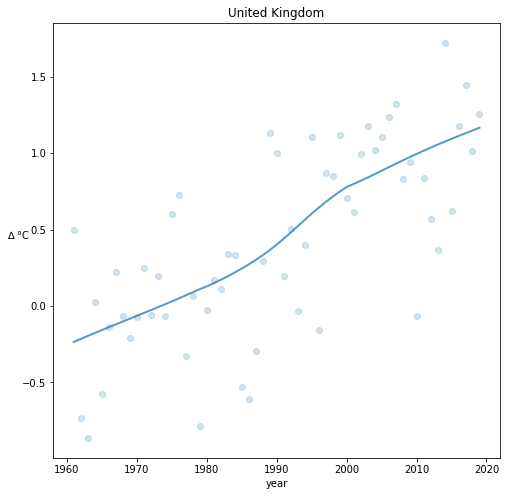

In [56]:
country_plot(uk, 'Meteorological year')

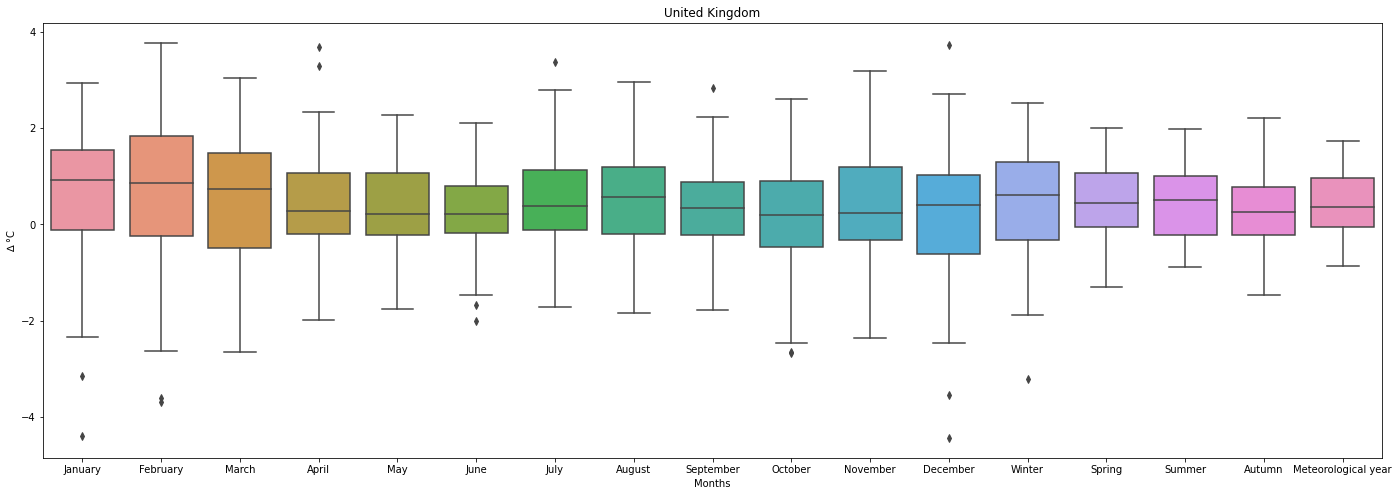

In [77]:
country_boxplot(months_temp_change(temp_change, 'United Kingdom'), 'United Kingdom')

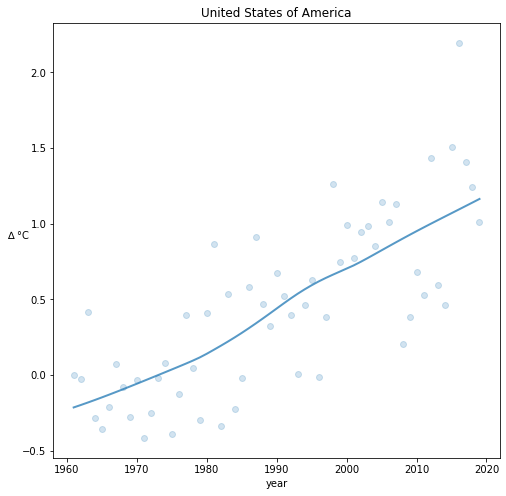

In [57]:
usa = country_temp_change(temp_change, "United States of America")
country_plot(usa, 'Meteorological year')

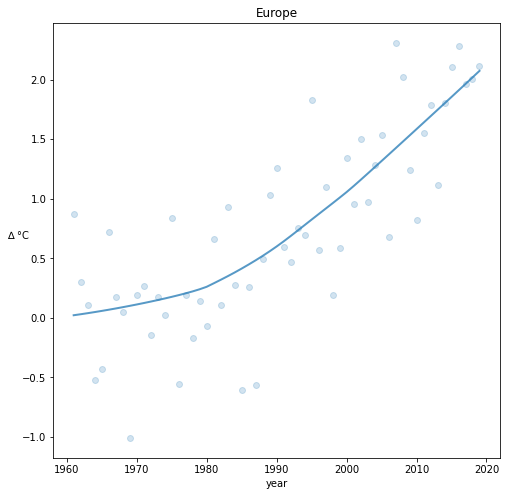

In [17]:
europe = country_temp_change(temp_change, "Europe")
country_plot(europe, 'Meteorological year')

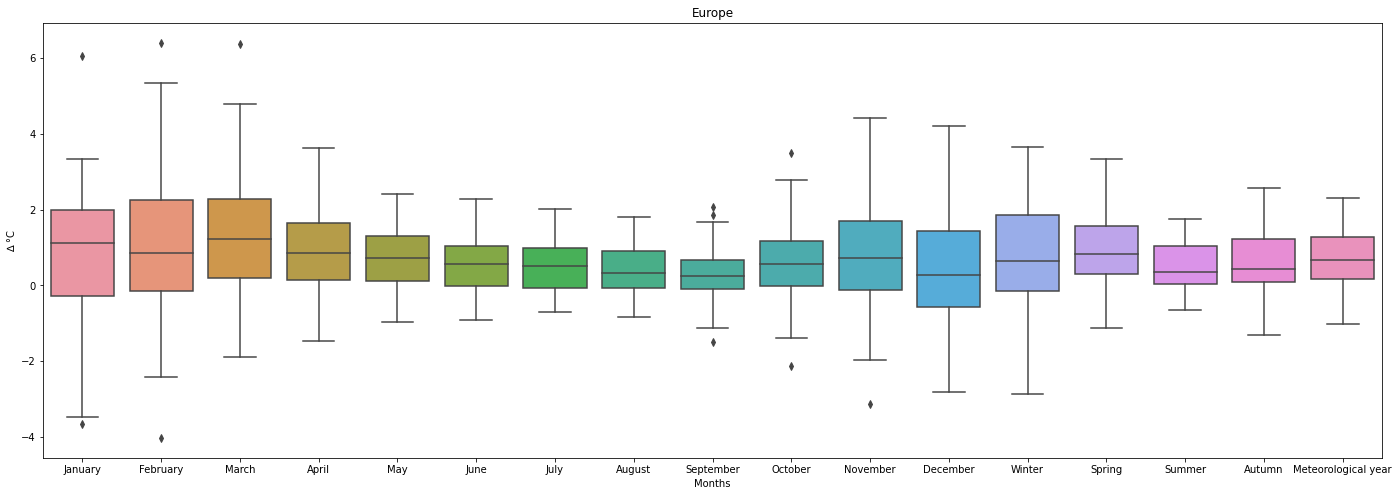

In [78]:
country_boxplot(months_temp_change(temp_change, 'Europe'), 'Europe')

In [58]:
world = temp_change[temp_change["area"] == "World"].T.reset_index().drop(0)
world.index.name = 'world'
world.head()

,index,8398,8399,8400,8401,8402,8403,8404,8405,8406,...,8422,8423,8424,8425,8426,8427,8428,8429,8430,8431
world,,,,,,,,,,,,,,,,,,,,,
1,months,January,January,February,February,March,March,April,April,May,...,Winter,Winter,Spring,Spring,Summer,Summer,Autumn,Autumn,Meteorological year,Meteorological year
2,element,Temperature change,Standard Deviation,Temperature change,Standard Deviation,Temperature change,Standard Deviation,Temperature change,Standard Deviation,Temperature change,...,Temperature change,Standard Deviation,Temperature change,Standard Deviation,Temperature change,Standard Deviation,Temperature change,Standard Deviation,Temperature change,Standard Deviation
3,1961,0.399,0.417,0.263,0.58,0.254,0.403,0.278,0.277,0.367,...,0.439,0.35,0.3,0.243,0.106,0.187,-0.016,0.22,0.207,0.201
4,1962,0.104,0.417,0.218,0.58,0.279,0.403,0.027,0.277,-0.183,...,0.035,0.35,0.041,0.243,-0.084,0.187,0.143,0.22,0.034,0.201
5,1963,-0.171,0.417,0.563,0.58,-0.237,0.403,0.002,0.277,-0.029,...,0.168,0.35,-0.088,0.243,0.082,0.187,0.473,0.22,0.159,0.201


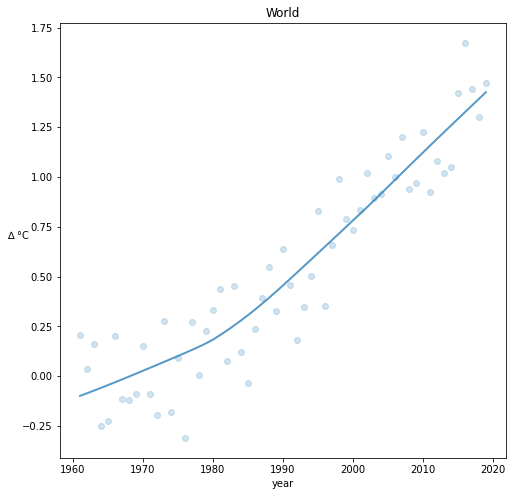

In [32]:
world = country_temp_change(temp_change, "World")
country_plot(world, 'Meteorological year')

In [59]:
# See what is the state of the data, how many null values are there? (may give irregular data trends)
temp_change.isnull().sum()

area          0
months        0
element       0
1961       1369
1962       1334
           ... 
2015       1295
2016       1308
2017       1290
2018       1307
2019       1291
Length: 62, dtype: int64

<AxesSubplot:>

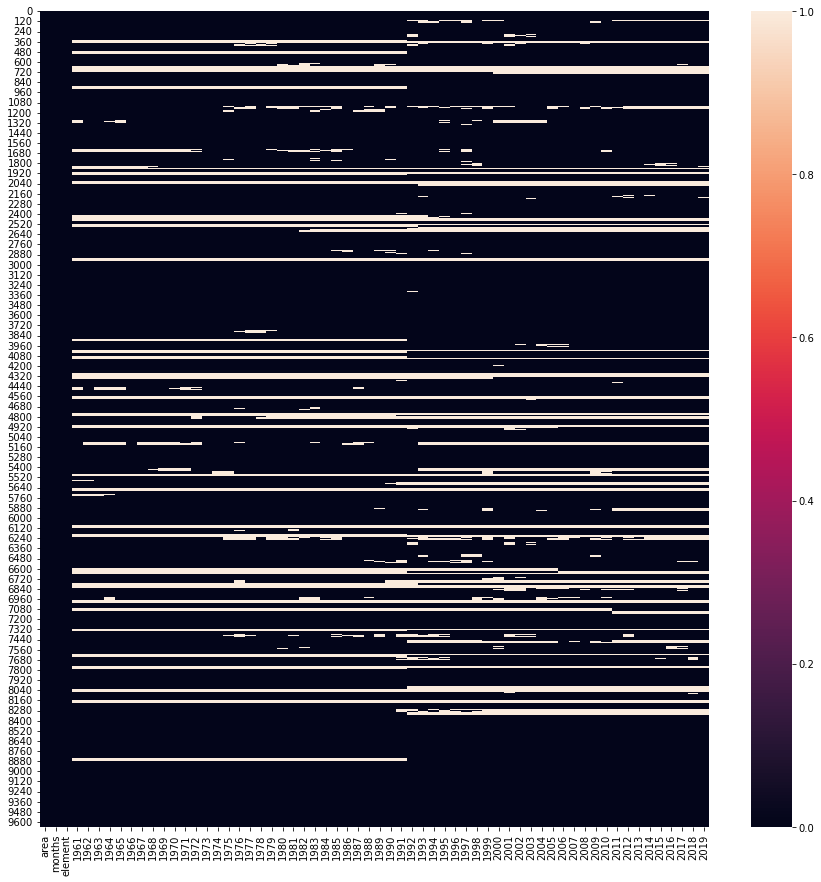

In [60]:
# visualise the null data within the set
plt.figure(figsize=(15,15))
sns.heatmap(temp_change.isnull())

In [45]:
null_var = temp_change.isnull().sum()/temp_change.shape[0]*100
null_var

area        0.000000
months      0.000000
element     0.000000
1961       14.177713
1962       13.815244
             ...    
2015       13.411350
2016       13.545982
2017       13.359569
2018       13.535626
2019       13.369925
Length: 62, dtype: float64

In [46]:
# drop the null data to clean up the data set
temp_change2_drop_rows = temp_change.dropna()

In [47]:
# what is the new shape of the clean data 
temp_change2_drop_rows.shape

(6760, 62)

<AxesSubplot:>

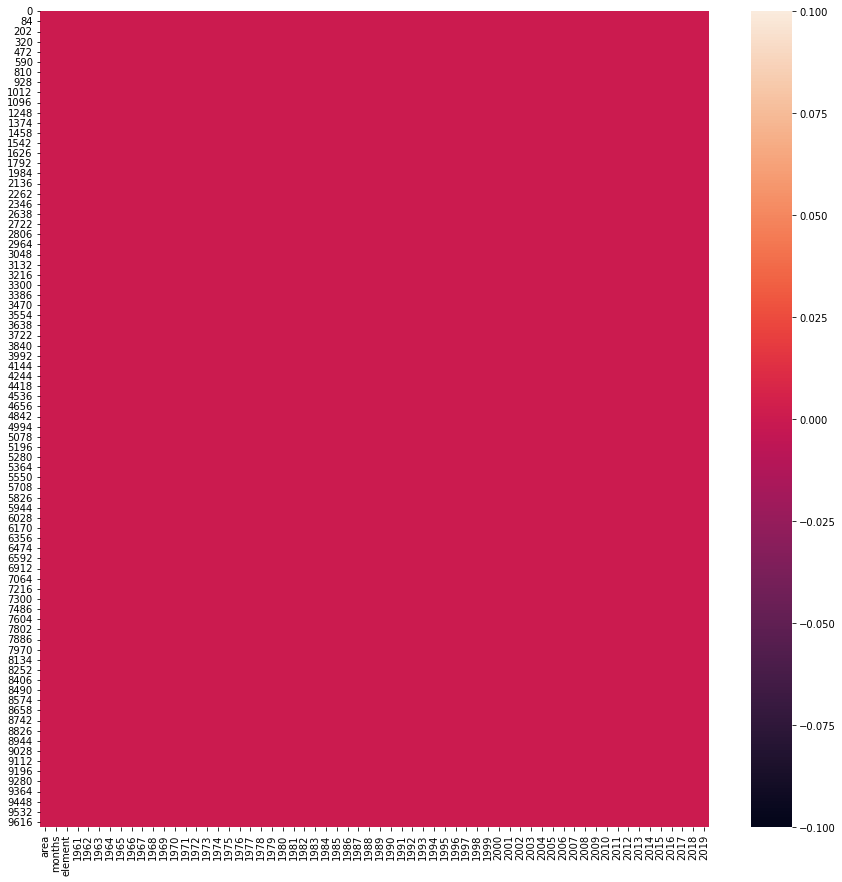

In [62]:
# visualise the new clean data - can see that there are no longer null values
plt.figure(figsize=(15,15))
sns.heatmap(temp_change2_drop_rows.isnull())

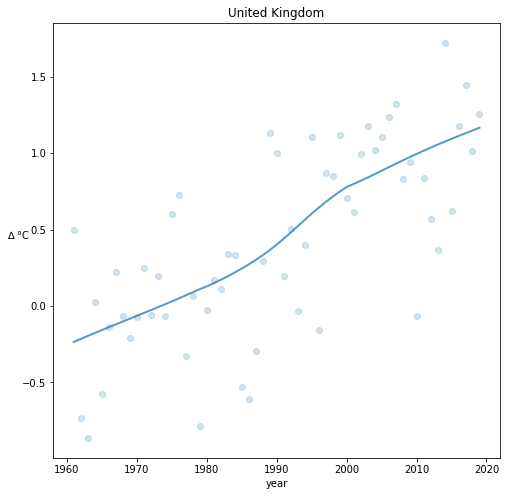

In [64]:
# see the UK temp change using the new clean data
# see that the change is the same and that the null data didn't impact the results
uk2 = country_temp_change(temp_change2_drop_rows, 'United Kingdom')
country_plot(uk2, 'Meteorological year')

<AxesSubplot:xlabel='1990', ylabel='Density'>

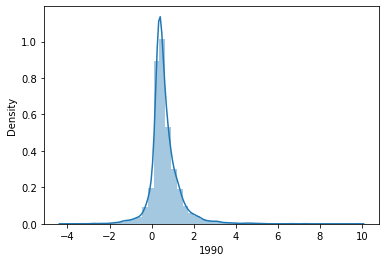

In [70]:
# distribution of data for old data with null values
sns.distplot(temp_change['1990'])

<AxesSubplot:xlabel='1990', ylabel='Density'>

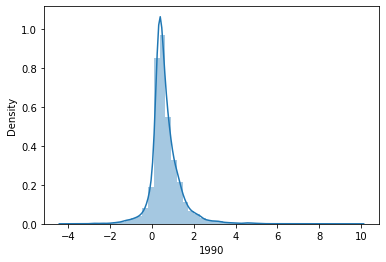

In [71]:
# distribution of data for new clean data with no null values
sns.distplot(temp_change2_drop_rows['1990'])

#### Not much difference arises after dropping the null rows (distplot -> distribution of data)

<AxesSubplot:xlabel='1990', ylabel='Density'>

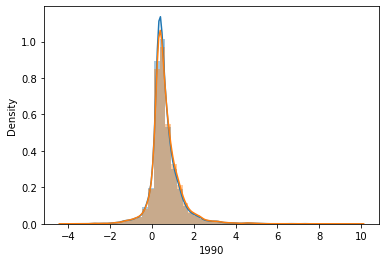

In [72]:
# as you can see not much difference in the distribution of data graphs.
sns.distplot(temp_change['1990'])
sns.distplot(temp_change2_drop_rows['1990'])

## Who is at fault? Based on Co2 emissions per country.

In [80]:
Co2.head()

,Country,Data source,Sector,Gas,Unit,2018,2017,2016,2015,2014,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,World,CAIT,Total including LUCF,CO2,MtCOâe,36441.55,35588.70,35160.60,34521.91,34558.59,...,24957.30,24895.32,25292.92,24214.92,23890.22,23260.29,23124.00,22988.29,23056.40,22849.92
1,China,CAIT,Total including LUCF,CO2,MtCOâe,9663.36,9367.67,9164.21,9120.27,9184.77,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,CAIT,Total including LUCF,CO2,MtCOâe,4749.57,4581.90,4656.84,4563.52,4683.35,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),CAIT,Total including LUCF,CO2,MtCOâe,2636.99,2692.12,2669.54,2321.61,2263.78,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,CAIT,Total including LUCF,CO2,MtCOâe,2400.25,2267.16,2149.01,2085.38,2072.03,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32


In [81]:
Co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      195 non-null    object 
 1   Data source  195 non-null    object 
 2   Sector       195 non-null    object 
 3   Gas          195 non-null    object 
 4   Unit         195 non-null    object 
 5   2018         195 non-null    float64
 6   2017         195 non-null    float64
 7   2016         195 non-null    float64
 8   2015         195 non-null    float64
 9   2014         195 non-null    float64
 10  2013         195 non-null    float64
 11  2012         195 non-null    float64
 12  2011         195 non-null    float64
 13  2010         195 non-null    float64
 14  2009         195 non-null    float64
 15  2008         195 non-null    float64
 16  2007         195 non-null    float64
 17  2006         195 non-null    float64
 18  2005         195 non-null    float64
 19  2004    

In [82]:
Co2.columns

Index(['Country', 'Data source', 'Sector', 'Gas', 'Unit', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990'],
      dtype='object')

In [83]:
Co2.shape

(195, 34)

In [84]:
Co2.isnull().sum()

Country        0
Data source    0
Sector         0
Gas            0
Unit           0
2018           0
2017           0
2016           0
2015           0
2014           0
2013           0
2012           0
2011           0
2010           0
2009           0
2008           0
2007           0
2006           0
2005           0
2004           0
2003           0
2002           0
2001           0
2000           0
1999           0
1998           0
1997           0
1996           0
1995           0
1994           0
1993           0
1992           0
1991           0
1990           1
dtype: int64

In [85]:
Co2 = Co2.dropna()

In [87]:
# Drop columns that only have 1 unique value
Co2 = Co2.drop(["Sector", "Gas", "Unit", "Data source"], axis=1) 

KeyError: "['Sector' 'Gas' 'Unit' 'Data source'] not found in axis"

In [88]:
# removing the first row as it has the sum of all rows under "World"
Co2 = Co2.iloc[1:,:]

In [89]:
Co2.head()

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1,China,9663.36,9367.67,9164.21,9120.27,9184.77,9226.51,8823.05,8568.09,8138.34,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,4749.57,4581.90,4656.84,4563.52,4683.35,4670.34,4531.16,4753.12,4990.96,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),2636.99,2692.12,2669.54,2321.61,2263.78,2408.39,2482.45,2541.91,2900.69,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,2400.25,2267.16,2149.01,2085.38,2072.03,1901.98,1843.74,1695.97,1670.29,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32
5,Indonesia,1269.55,1081.11,1068.10,1574.76,1539.23,1250.27,1303.87,1285.69,773.92,...,849.42,907.96,1484.56,772.38,909.21,881.31,869.88,855.30,846.23,832.39


In [90]:
Co2.sort_values(ascending=False, by="2018", inplace=True)

In [91]:
# Select the top 10 countries for analysis
Co2 = Co2.iloc[:10,:]

In [92]:
Co2.head(10)

,Country,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1,China,9663.36,9367.67,9164.21,9120.27,9184.77,9226.51,8823.05,8568.09,8138.34,...,2799.84,2882.75,2779.27,2715.50,2735.48,2414.50,2294.12,2068.77,1952.78,1823.96
2,United States,4749.57,4581.90,4656.84,4563.52,4683.35,4670.34,4531.16,4753.12,4990.96,...,5191.66,5172.06,5129.29,4864.46,4708.31,4654.52,4581.76,4461.62,4389.50,4426.40
3,European Union (27),2636.99,2692.12,2669.54,2321.61,2263.78,2408.39,2482.45,2541.91,2900.69,...,3079.46,3134.03,3142.23,3210.93,3113.68,3060.09,3072.40,3133.06,3247.48,3286.44
4,India,2400.25,2267.16,2149.01,2085.38,2072.03,1901.98,1843.74,1695.97,1670.29,...,683.00,618.73,600.38,555.60,519.98,466.79,431.31,409.09,386.17,341.32
5,Indonesia,1269.55,1081.11,1068.10,1574.76,1539.23,1250.27,1303.87,1285.69,773.92,...,849.42,907.96,1484.56,772.38,909.21,881.31,869.88,855.30,846.23,832.39
6,Japan,1074.08,1119.86,1139.33,1131.74,1170.11,1211.27,1202.66,1162.67,1057.96,...,1090.14,1055.50,1098.26,1110.51,1097.10,1087.22,1033.99,1041.79,1029.99,1016.89
7,Russia,1049.05,998.24,971.87,870.02,919.33,936.52,979.37,974.12,814.11,...,1081.87,1043.96,1052.50,1159.83,1190.39,1238.41,1447.33,1630.98,1766.89,1790.34
8,Brazil,812.02,834.14,826.21,741.96,768.77,744.85,713.75,679.10,1498.84,...,1339.10,1329.24,1319.99,1301.37,1279.97,1261.19,1253.64,1247.13,1243.65,1236.73
9,Germany,680.06,702.73,717.68,713.08,708.25,748.42,730.81,717.17,754.58,...,782.33,812.12,819.93,851.78,822.15,824.87,836.08,841.83,881.44,904.38
10,Iran,629.35,620.83,605.81,602.23,610.67,592.48,571.12,561.73,506.63,...,306.00,272.42,271.00,259.83,251.99,240.77,210.86,212.99,197.26,158.83


In [93]:
Co2 = Co2.transpose()
head_row = Co2.iloc[0]
Co2 = Co2[1:]
Co2.columns = head_row
Co2.head()

Country,China,United States,European Union (27),India,Indonesia,Japan,Russia,Brazil,Germany,Iran
2018,9663.36,4749.57,2636.99,2400.25,1269.55,1074.08,1049.05,812.02,680.06,629.35
2017,9367.67,4581.9,2692.12,2267.16,1081.11,1119.86,998.24,834.14,702.73,620.83
2016,9164.21,4656.84,2669.54,2149.01,1068.1,1139.33,971.87,826.21,717.68,605.81
2015,9120.27,4563.52,2321.61,2085.38,1574.76,1131.74,870.02,741.96,713.08,602.23
2014,9184.77,4683.35,2263.78,2072.03,1539.23,1170.11,919.33,768.77,708.25,610.67


#### Transposed rows and columns for easy plotting of dataset

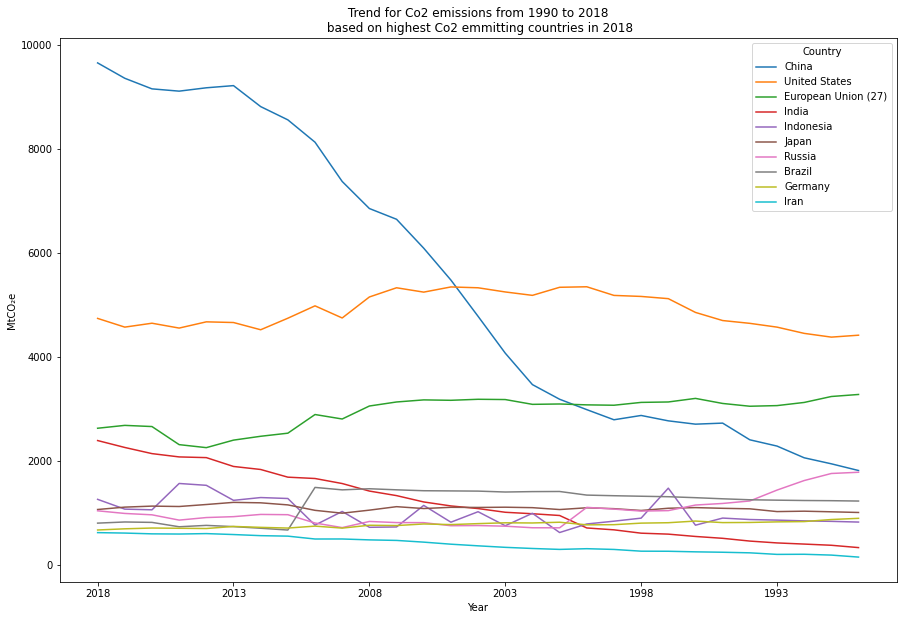

In [94]:
Co2.plot(figsize=(15, 10))
plt.title(" Trend for Co2 emissions from 1990 to 2018 \n based on highest Co2 emmitting countries in 2018")
plt.ylabel("MtCO₂e")
plt.xlabel("Year")

plt.show()

#### Increase in Co2 emmissions from 1990 to 2018 top 10 country wise
##### We can see China has the highest curve showing maximum increase in Co2 emmissions, followed by India's curve showing increasing trend

We can see the highest emissions is by China and further most increasing trend is also China which shows high activities in Co2 related industries and not any measures being taken to reduce these emissions

India has increased Co2 emissions from 1990 to 2018 which also points to increased industrial activity in India

Countries like US and EU which were in the top countries from 2018 as well as 1990 are not in the last trend chart of showing increase in Co2 emmissions can let us refer that these countries have somewhat maintained their Co2 emmissions as their values in both 1990 and 2018 remain consistant i.e approv 4000 MtCO₂e for US and 3000 MtCO₂e for EU and thus probably working on cutting these or taking alternative energy approches.